In [15]:
%matplotlib inline
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [8]:
images = []
for f in glob.glob("train/0/*mask.tif"):
    images.append(f)

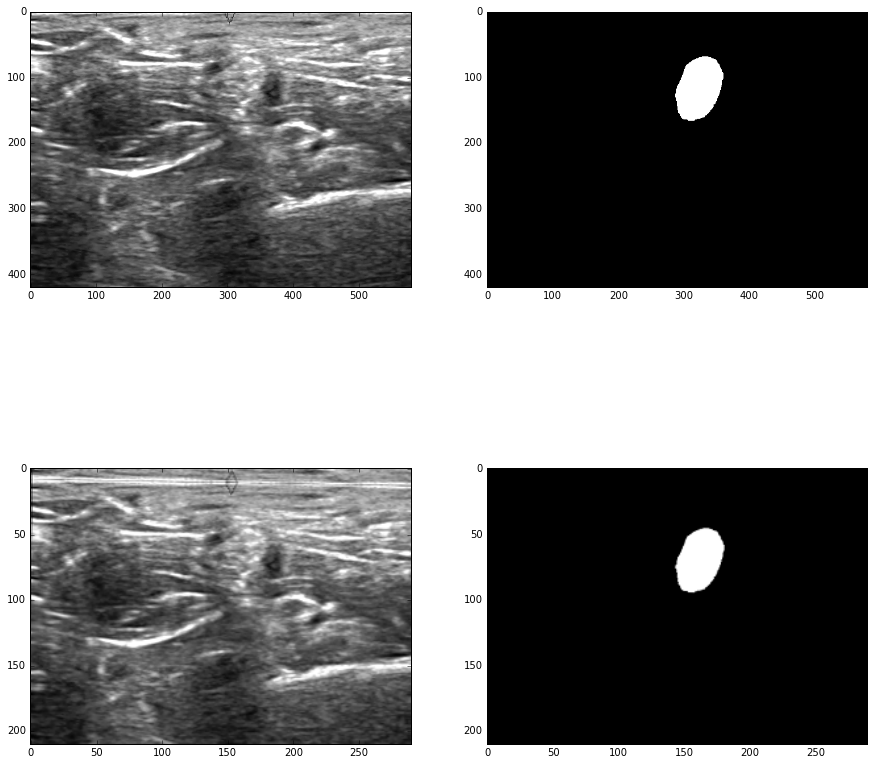

****************************************************************************************************


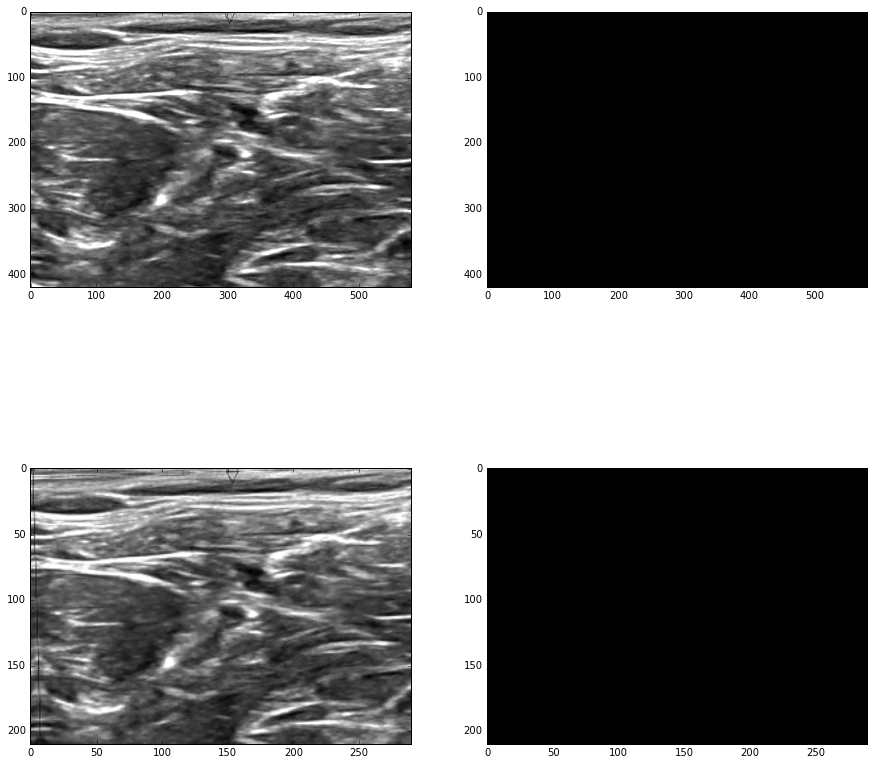

****************************************************************************************************


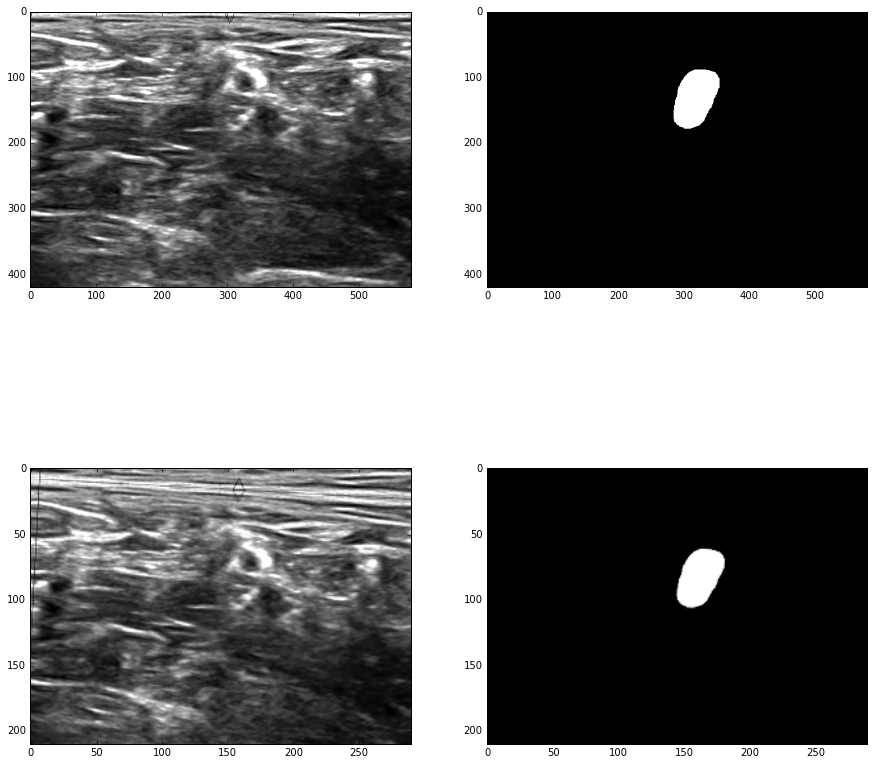

****************************************************************************************************
Total number of files generated = 112700


In [31]:
j = 0
level = 1
writePath = "train/" + str(level) + "/"
for imgPath in images[:]:
    idx = images.index(imgPath)
    y = cv2.imread(imgPath,0)
    x = cv2.imread(imgPath.replace("_mask",""),0)
    
    rows,cols = y.shape
    for i in range(20):
        M = cv2.getRotationMatrix2D((cols/2,rows/2),np.random.uniform(-5,5),1)
        tX, tY = np.random.randint(0,20,2)
        M[0,2] = tX
        M[1,2] = tY
        x1,y1 = [cv2.warpAffine(img,M,(cols,rows),borderMode = 4) for img in [x,y]]
        x1,y1 = [cv2.resize(img,None,fx=1.0/np.power(2,level), fy=1.0/np.power(2,level), interpolation = cv2.INTER_CUBIC) for img in [x1,y1]]
        if j % 50000 == 0:
            plt.subplot(221)
            plt.imshow(x,cmap=cm.gray)
            plt.subplot(222)
            plt.imshow(y,cmap=cm.gray)
            plt.subplot(223)
            plt.imshow(x1,cmap=cm.gray)
            plt.subplot(224)
            plt.imshow(y1,cmap=cm.gray)
            plt.show()
            print("*"*100)
        j += 1
        cv2.imwrite(writePath + "x_" + str(j) + ".jpg",x1)
        cv2.imwrite(writePath + "y_" + str(j) + ".jpg",y1)
        
print("Total number of files generated = %d" % j)